In [47]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix
import numpy as np
import copy as cp
import seaborn as sns
from typing import Tuple
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("stres_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   timestamp           202 non-null    object
 1   gender              201 non-null    object
 2   age                 201 non-null    object
 3   wedding_mood        199 non-null    object
 4   safe_place          198 non-null    object
 5   calming_method      201 non-null    object
 6   study_time          201 non-null    object
 7   driver_licence_try  199 non-null    object
 8   many_friends        200 non-null    object
 9   activity            200 non-null    object
 10  sign                199 non-null    object
 11  stress              202 non-null    object
dtypes: object(12)
memory usage: 19.1+ KB


In [4]:
data.head()

,timestamp,gender,age,wedding_mood,safe_place,calming_method,study_time,driver_licence_try,many_friends,activity,sign,stress
0,23.05.2023 19:36:29,Kadın,18-24,Aşırı heyecanlanırım.,Sevdiğim kişinin olduğu her yer,Oturup geçmesini bekliyorum.,Son gün çalışırım.,Henüz almadım.,Hayır,Uyumak.,İkizler,Stresli
1,23.05.2023 19:43:30,Erkek,25-34,Aşırı heyecanlanırım.,Arkadaşlarımla olduğum her yer,Olumlu düşünmeye çalışıyorum.,Son 2 hafta kala çalışırım.,Tekte aldım.,Evet,Arkadaşlarımla vakit geçirmek.,Koç,Stresli
2,23.05.2023 19:45:14,Kadın,18-24,Aşırı heyecanlanırım.,Sevdiğim kişinin olduğu her yer,Beni sakinleştirecek birine ihtiyaç duyuyorum.,Son 1 hafta kala çalışırım.,Tekte aldım.,Evet,Arkadaşlarımla vakit geçirmek.,Kova,Stresli
3,23.05.2023 19:45:36,Kadın,25-34,Aşırı heyecanlanırım.,Sevdiğim kişinin olduğu her yer,Olumlu düşünmeye çalışıyorum.,Son 2 hafta kala çalışırım.,Tekte aldım.,Hayır,Arkadaşlarımla vakit geçirmek.,Yay,Stresli
4,23.05.2023 19:47:12,Erkek,25-34,Gerilirim.,Ailemin yanı,Olumlu düşünmeye çalışıyorum.,Son gün çalışırım.,Tekte aldım.,Evet,Arkadaşlarımla vakit geçirmek.,Yengeç,Stresli


In [5]:
# Zaman gereksiz olduğu için kaldırıldı
data.drop("timestamp",axis=1,inplace=True)

In [6]:
data.head()

,gender,age,wedding_mood,safe_place,calming_method,study_time,driver_licence_try,many_friends,activity,sign,stress
0,Kadın,18-24,Aşırı heyecanlanırım.,Sevdiğim kişinin olduğu her yer,Oturup geçmesini bekliyorum.,Son gün çalışırım.,Henüz almadım.,Hayır,Uyumak.,İkizler,Stresli
1,Erkek,25-34,Aşırı heyecanlanırım.,Arkadaşlarımla olduğum her yer,Olumlu düşünmeye çalışıyorum.,Son 2 hafta kala çalışırım.,Tekte aldım.,Evet,Arkadaşlarımla vakit geçirmek.,Koç,Stresli
2,Kadın,18-24,Aşırı heyecanlanırım.,Sevdiğim kişinin olduğu her yer,Beni sakinleştirecek birine ihtiyaç duyuyorum.,Son 1 hafta kala çalışırım.,Tekte aldım.,Evet,Arkadaşlarımla vakit geçirmek.,Kova,Stresli
3,Kadın,25-34,Aşırı heyecanlanırım.,Sevdiğim kişinin olduğu her yer,Olumlu düşünmeye çalışıyorum.,Son 2 hafta kala çalışırım.,Tekte aldım.,Hayır,Arkadaşlarımla vakit geçirmek.,Yay,Stresli
4,Erkek,25-34,Gerilirim.,Ailemin yanı,Olumlu düşünmeye çalışıyorum.,Son gün çalışırım.,Tekte aldım.,Evet,Arkadaşlarımla vakit geçirmek.,Yengeç,Stresli


In [7]:
# 2 den fazla null değeri olan satırlar kaldırıldı

data = data[data.isnull().sum(axis=1) < 2]

# null değerli kısımlar özelliği içinde en çok frekanstaki değerlerle dolduruldu

data['driver_licence_try'].fillna('Tekte aldım.',inplace=True)
data['many_friends'].fillna('Evet',inplace=True)
data['activity'].fillna('Arkadaşlarımla vakit geçirmek.',inplace=True)
data['sign'].fillna('Balık',inplace=True)
data['wedding_mood'].fillna('Aşırı heyecanlanırım.',inplace=True)
data['safe_place'].fillna('Sevdiğim kişinin olduğu her yer',inplace=True)

In [8]:
data['wedding_mood'].value_counts()

Aşırı heyecanlanırım.    76
Gerilirim.               75
Mutluluktan uyuyamam.    34
Aşırı rahat olurum.      15
Name: wedding_mood, dtype: int64

In [9]:
data['safe_place'].value_counts()

Sevdiğim kişinin olduğu her yer    64
Yalnız olduğum her yer             41
Ailemin yanı                       40
Arkadaşlarımla olduğum her yer     28
Tatile çıktığım her an             27
Name: safe_place, dtype: int64

In [11]:
X = data.drop("stress", axis=1)
y = data["stress"]

# Kategorik değerleri sayısal değerlere dönüştürme
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Dönüştürülmüş veri kümesinin ilk 5 gözlemine bakma
print(X_encoded.head())

   gender  age  wedding_mood  safe_place  calming_method  study_time  \
0       2    1             0           2               3           4   
1       1    2             0           1               2           3   
2       2    1             0           2               1           2   
3       2    2             0           2               2           3   
4       1    2             2           0               2           4   

   driver_licence_try  many_friends  activity  sign  
0                   0             1         5    11  
1                   1             0         0     6  
2                   1             0         0     5  
3                   1             1         0     9  
4                   1             0         0    10  


In [12]:
def cxxc(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

In [13]:
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)  # orjinal modeli değiştirmemek için model kopyalama
    
    no_classes = len(np.unique(y))  # sınıf sayısı hesabı
    
    # gerçek, tahmin edilen ve tahmin edilen olasılıkları depolamak için boş diziler
    actual_classes = np.empty([0], dtype=int)  
    predicted_classes = np.empty([0], dtype=int)  
    predicted_proba = np.empty([0, no_classes])  

    for train_ndx, test_ndx in kfold.split(X):  # k-fold çapraz doğrulama bölümlerini döngüye alma

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]  

        actual_classes = np.append(actual_classes, test_y)  # gerçek sınıfları actual_classes dizisine ekleme

        model_.fit(train_X, train_y)  # model eğitimi
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))  # test veri seti için sınıf tahminlerini predicted_classes dizisine ekleme

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)  # testt veri seti için sınıf olasılıklarını predicted_proba dizisine ekleme
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)  # eğer modelin `predict_proba` metodu yoksa, sıfırlardan oluşan bir dizi ekleme

    return actual_classes, predicted_classes, predicted_proba  

In [14]:

def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list, title):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels, normalize='true') # karmaşıklık matrisini çıkarma (oranları görmek için normalize edilmiş)
    
    plt.figure(figsize=(8,3))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Tahmin Edilen'); plt.ylabel('Gerçek'); plt.title(title)

    plt.show()

In [15]:
def trainAndEvaluateModel(model,tahminleyici,X):
  kfold = KFold(n_splits=10, random_state=42, shuffle=True) # 10 katlı çapraz doğrulama tanımı
  cv_results = cross_val_score(model, X_encoded, y, cv=kfold, scoring='accuracy', verbose=10) # her kat için doğruluk
  actual_classes, predicted_classes, _ = cross_val_predict(model, kfold, X, y.to_numpy()) # tahmin sonuçlarını alma
  plot_confusion_matrix(actual_classes, predicted_classes, ["Stresli","Sakin"], tahminleyici +' Karmaşıklık Matrisi') # tahmin sonuçlarının ortalamasıyla karmaşıklık matrisi
  print('\nÇapraz geçerleme sonucu ' + tahminleyici + ' için elde edilen metrikler:\n',classification_report(actual_classes, predicted_classes, target_names=['Sakin','Stresli'])) # f1-skor gibi metriklerin ortalama sonuçları
  print('\n Ortalama Doğruluk: ',accuracy_score(actual_classes, predicted_classes))

[CV] START .....................................................................
[CV] END ................................ score: (test=0.650) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.0s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


[CV] END ................................ score: (test=0.500) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.650) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.650) total time=   0.0s


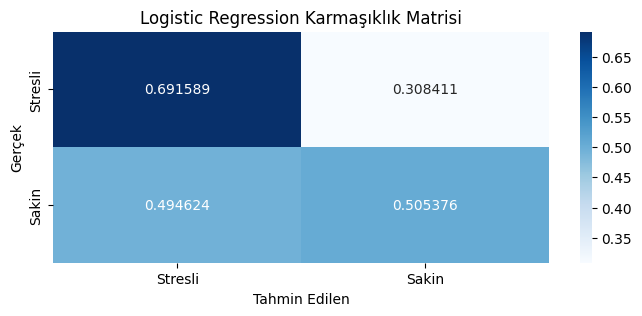


Çapraz geçerleme sonucu Logistic Regression için elde edilen metrikler:
               precision    recall  f1-score   support

       Sakin       0.59      0.51      0.54        93
     Stresli       0.62      0.69      0.65       107

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.60      0.60      0.60       200


 Ortalama Doğruluk:  0.605


In [16]:
model = LogisticRegression()
trainAndEvaluateModel(model,'Logistic Regression',X_encoded.to_numpy())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.8s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] END ................................ score: (test=0.550) total time=   1.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] END ................................ score: (test=0.600) total time=   1.5s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s remaining:    0.0s


[CV] END ................................ score: (test=0.650) total time=   1.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.7s remaining:    0.0s


[CV] END ................................ score: (test=0.450) total time=   0.8s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.5s remaining:    0.0s


[CV] END ................................ score: (test=0.750) total time=   0.5s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.850) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.2s remaining:    0.0s


[CV] END ................................ score: (test=0.600) total time=   0.2s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.700) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.6s remaining:    0.0s


[CV] END ................................ score: (test=0.500) total time=   0.2s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.8s finished


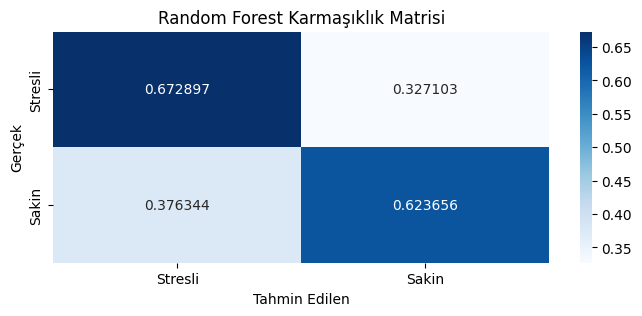


Çapraz geçerleme sonucu Random Forest için elde edilen metrikler:
               precision    recall  f1-score   support

       Sakin       0.62      0.62      0.62        93
     Stresli       0.67      0.67      0.67       107

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.65      0.65      0.65       200


 Ortalama Doğruluk:  0.65


In [21]:
rf = RandomForestClassifier()
trainAndEvaluateModel(rf,'Random Forest',X_encoded.to_numpy())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[CV] START .....................................................................
[CV] END ................................ score: (test=0.650) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.400) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.600) total time=   0.0s
[CV] START .................

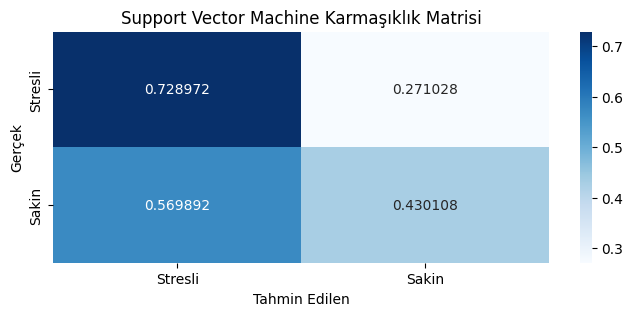


Çapraz geçerleme sonucu Support Vector Machine için elde edilen metrikler:
               precision    recall  f1-score   support

       Sakin       0.58      0.43      0.49        93
     Stresli       0.60      0.73      0.66       107

    accuracy                           0.59       200
   macro avg       0.59      0.58      0.57       200
weighted avg       0.59      0.59      0.58       200


 Ortalama Doğruluk:  0.59


In [23]:
svm = SVC()
trainAndEvaluateModel(svm,'Support Vector Machine',X_encoded.to_numpy())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.800) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.400) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.400) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[CV] START .................

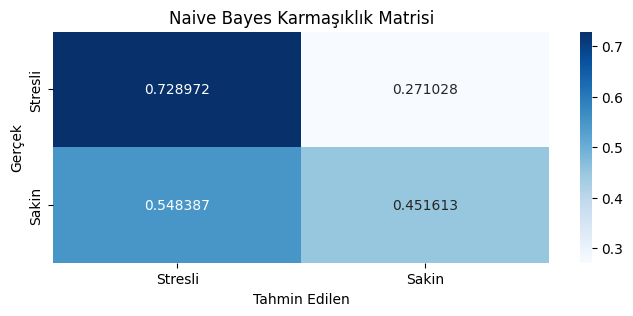


Çapraz geçerleme sonucu Naive Bayes için elde edilen metrikler:
               precision    recall  f1-score   support

       Sakin       0.59      0.45      0.51        93
     Stresli       0.60      0.73      0.66       107

    accuracy                           0.60       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.60      0.60      0.59       200


 Ortalama Doğruluk:  0.6


In [25]:
nb = GaussianNB()
trainAndEvaluateModel(nb, 'Naive Bayes',X_encoded.to_numpy())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[CV] START .....................................................................
[CV] END ................................ score: (test=0.700) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.600) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.550) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.300) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.350) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.600) total time=   0.0s
[CV] START .................

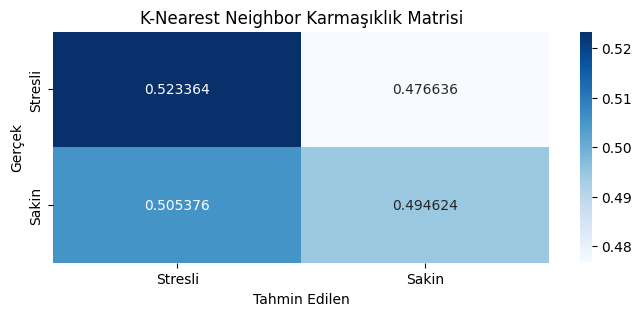


Çapraz geçerleme sonucu K-Nearest Neighbor için elde edilen metrikler:
               precision    recall  f1-score   support

       Sakin       0.47      0.49      0.48        93
     Stresli       0.54      0.52      0.53       107

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200


 Ortalama Doğruluk:  0.51


In [26]:
knn = KNeighborsClassifier()
trainAndEvaluateModel(knn, 'K-Nearest Neighbor',X_encoded.to_numpy())

In [27]:
data['stress'].value_counts()

Stresli    107
Sakin       93
Name: stress, dtype: int64

In [46]:
X_new = SelectKBest(f_classif, k=3).fit_transform(X_encoded, y) # Univariate özellik seçimi en iyi 3 özellik tutuluyor
X_new.shape

(200, 3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[CV] START .....................................................................
[CV] END ................................ score: (test=0.650) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[CV] START .................

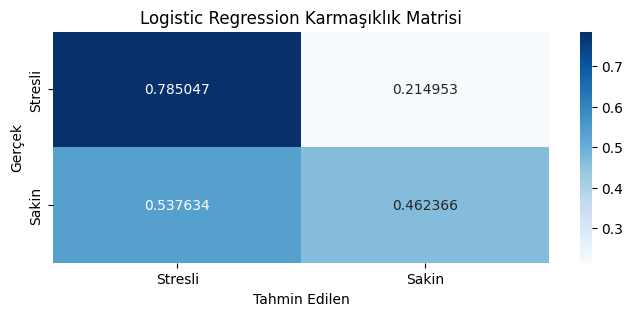


Çapraz geçerleme sonucu Logistic Regression için elde edilen metrikler:
               precision    recall  f1-score   support

       Sakin       0.65      0.46      0.54        93
     Stresli       0.63      0.79      0.70       107

    accuracy                           0.64       200
   macro avg       0.64      0.62      0.62       200
weighted avg       0.64      0.64      0.62       200


 Ortalama Doğruluk:  0.635


In [29]:
lr = LogisticRegression()
trainAndEvaluateModel(lr,'Logistic Regression',X_new)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.800) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ................................ score: (test=0.700) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] END ................................ score: (test=0.700) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV] END ................................ score: (test=0.650) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s


[CV] END ................................ score: (test=0.500) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s remaining:    0.0s


[CV] END ................................ score: (test=0.650) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.7s remaining:    0.0s


[CV] END ................................ score: (test=0.850) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.1s remaining:    0.0s


[CV] END ................................ score: (test=0.650) total time=   0.3s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.650) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.6s remaining:    0.0s


[CV] END ................................ score: (test=0.550) total time=   0.2s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.8s finished


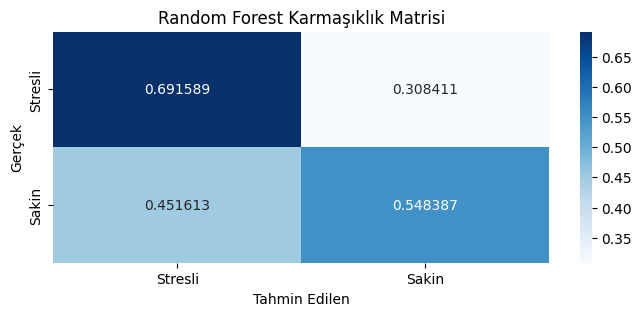


Çapraz geçerleme sonucu Random Forest için elde edilen metrikler:
               precision    recall  f1-score   support

       Sakin       0.61      0.55      0.58        93
     Stresli       0.64      0.69      0.66       107

    accuracy                           0.62       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.62      0.62      0.62       200


 Ortalama Doğruluk:  0.625


In [30]:
rf = RandomForestClassifier()
trainAndEvaluateModel(rf,'Random Forest',X_new)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[CV] START .....................................................................
[CV] END ................................ score: (test=0.650) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.400) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.600) total time=   0.0s
[CV] START .................

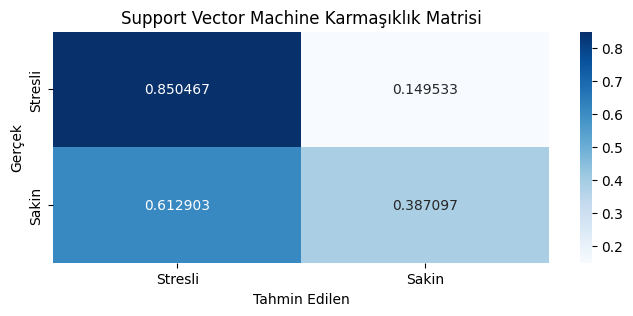


Çapraz geçerleme sonucu Support Vector Machine için elde edilen metrikler:
               precision    recall  f1-score   support

       Sakin       0.69      0.39      0.50        93
     Stresli       0.61      0.85      0.71       107

    accuracy                           0.64       200
   macro avg       0.65      0.62      0.61       200
weighted avg       0.65      0.64      0.61       200


 Ortalama Doğruluk:  0.635


In [31]:
svm = SVC()
trainAndEvaluateModel(svm,'Support Vector Machine',X_new)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.800) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.400) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.400) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


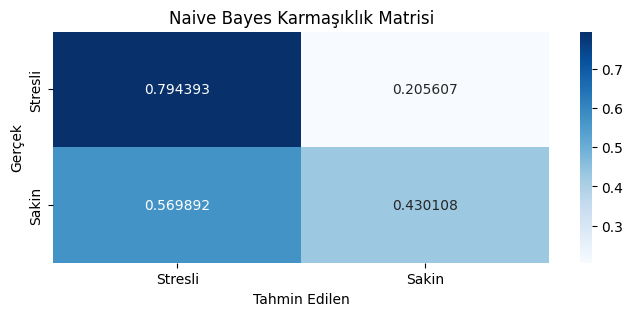


Çapraz geçerleme sonucu Naive Bayes için elde edilen metrikler:
               precision    recall  f1-score   support

       Sakin       0.65      0.43      0.52        93
     Stresli       0.62      0.79      0.69       107

    accuracy                           0.62       200
   macro avg       0.63      0.61      0.61       200
weighted avg       0.63      0.62      0.61       200


 Ortalama Doğruluk:  0.625


In [32]:
nb = GaussianNB()
trainAndEvaluateModel(nb,'Naive Bayes',X_new)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[CV] START .....................................................................
[CV] END ................................ score: (test=0.700) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.600) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.550) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.300) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.350) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.600) total time=   0.0s
[CV] START .................

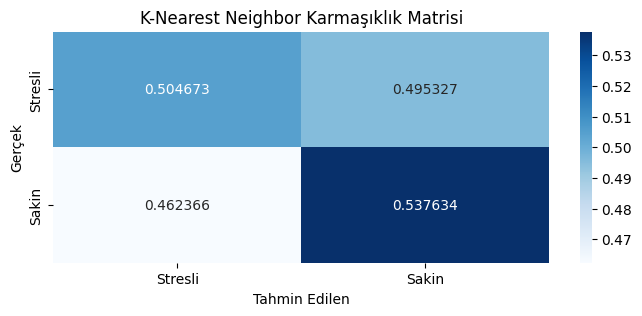


Çapraz geçerleme sonucu K-Nearest Neighbor için elde edilen metrikler:
               precision    recall  f1-score   support

       Sakin       0.49      0.54      0.51        93
     Stresli       0.56      0.50      0.53       107

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200


 Ortalama Doğruluk:  0.52


In [33]:
knn = KNeighborsClassifier()
trainAndEvaluateModel(knn,'K-Nearest Neighbor',X_new)

In [34]:
label_encoder = LabelEncoder()
tmp_encoded = data.apply(label_encoder.fit_transform)

In [35]:
tmp_encoded.corr() # 'stress' özelliği ile kümedeki öbür özelliklerin korelasyonunun incelenmesi

,gender,age,wedding_mood,safe_place,calming_method,study_time,driver_licence_try,many_friends,activity,sign,stress
gender,1.000000,0.201243,-0.068476,-0.066658,0.061856,0.115058,-0.110436,-0.014054,-0.102115,0.024844,0.131823
age,0.201243,1.000000,0.122051,-0.143219,-0.133423,-0.105736,0.231784,0.042623,0.251958,-0.114125,-0.104375
wedding_mood,-0.068476,0.122051,1.000000,0.002100,0.079275,-0.093598,0.001357,-0.024625,0.099494,0.017154,-0.129391
safe_place,-0.066658,-0.143219,0.002100,1.000000,0.071831,0.024818,0.011221,-0.010561,-0.015194,-0.056511,-0.069436
calming_method,0.061856,-0.133423,0.079275,0.071831,1.000000,0.034649,-0.135462,0.033592,-0.097865,0.084363,0.141605
study_time,0.115058,-0.105736,-0.093598,0.024818,0.034649,1.000000,-0.103102,0.002315,-0.116830,0.150755,-0.029673
driver_licence_try,-0.110436,0.231784,0.001357,0.011221,-0.135462,-0.103102,1.000000,0.026316,0.108068,-0.145985,0.044133
many_friends,-0.014054,0.042623,-0.024625,-0.010561,0.033592,0.002315,0.026316,1.000000,0.096521,-0.031768,0.007766
activity,-0.102115,0.251958,0.099494,-0.015194,-0.097865,-0.116830,0.108068,0.096521,1.000000,-0.045013,-0.185906
sign,0.024844,-0.114125,0.017154,-0.056511,0.084363,0.150755,-0.145985,-0.031768,-0.045013,1.000000,0.022181


In [36]:
tmp_set = X_encoded[['gender','age','wedding_mood','calming_method','activity']]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[CV] START .....................................................................
[CV] END ................................ score: (test=0.650) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[CV] START .................

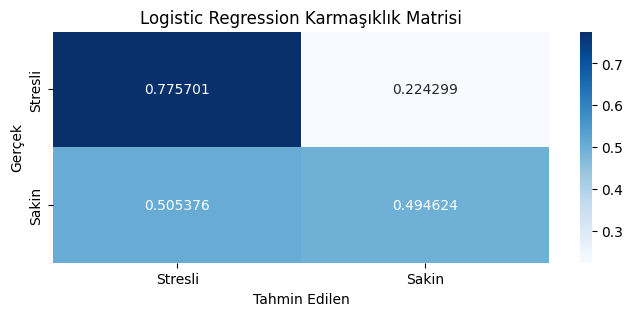


Çapraz geçerleme sonucu Logistic Regression için elde edilen metrikler:
               precision    recall  f1-score   support

       Sakin       0.66      0.49      0.56        93
     Stresli       0.64      0.78      0.70       107

    accuracy                           0.65       200
   macro avg       0.65      0.64      0.63       200
weighted avg       0.65      0.65      0.64       200


 Ortalama Doğruluk:  0.645


In [37]:
lr = LogisticRegression()
trainAndEvaluateModel(lr,'Logistic Regression',tmp_set.to_numpy())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................................ score: (test=0.650) total time=   0.2s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.2s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV] END ................................ score: (test=0.650) total time=   0.2s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s


[CV] END ................................ score: (test=0.700) total time=   0.2s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.3s remaining:    0.0s


[CV] END ................................ score: (test=0.700) total time=   0.2s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.6s remaining:    0.0s


[CV] END ................................ score: (test=0.500) total time=   0.2s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished


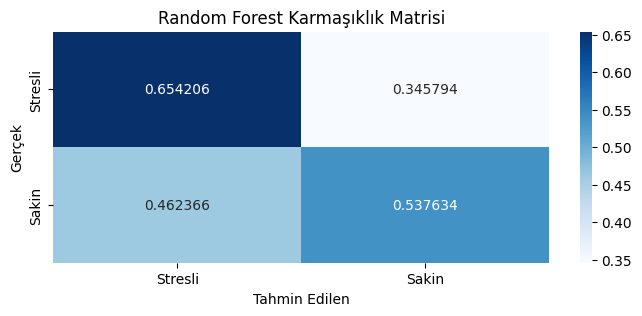


Çapraz geçerleme sonucu Random Forest için elde edilen metrikler:
               precision    recall  f1-score   support

       Sakin       0.57      0.54      0.56        93
     Stresli       0.62      0.65      0.64       107

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.60       200
weighted avg       0.60      0.60      0.60       200


 Ortalama Doğruluk:  0.6


In [40]:
rf = RandomForestClassifier()
trainAndEvaluateModel(rf,'Random Forest',tmp_set.to_numpy())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[CV] START .....................................................................
[CV] END ................................ score: (test=0.650) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.400) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.450) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.600) total time=   0.0s
[CV] START .................

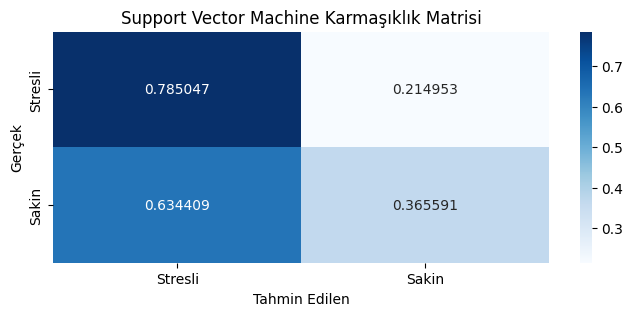


Çapraz geçerleme sonucu Support Vector Machine için elde edilen metrikler:
               precision    recall  f1-score   support

       Sakin       0.60      0.37      0.45        93
     Stresli       0.59      0.79      0.67       107

    accuracy                           0.59       200
   macro avg       0.59      0.58      0.56       200
weighted avg       0.59      0.59      0.57       200


 Ortalama Doğruluk:  0.59


In [43]:
svm = SVC()
trainAndEvaluateModel(svm,'Support Vector Machine',tmp_set.to_numpy())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


[CV] START .....................................................................
[CV] END ................................ score: (test=0.750) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.800) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.400) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.400) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[CV] START .................

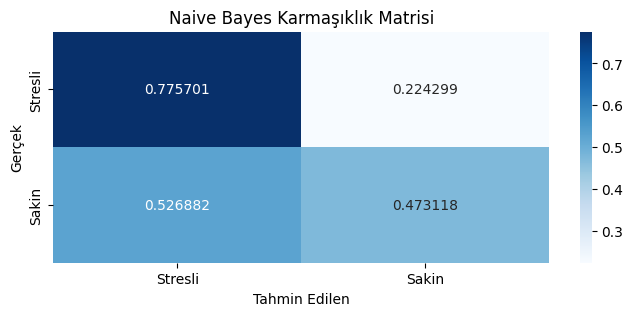


Çapraz geçerleme sonucu Naive Bayes için elde edilen metrikler:
               precision    recall  f1-score   support

       Sakin       0.65      0.47      0.55        93
     Stresli       0.63      0.78      0.69       107

    accuracy                           0.64       200
   macro avg       0.64      0.62      0.62       200
weighted avg       0.64      0.64      0.63       200


 Ortalama Doğruluk:  0.635


In [42]:
nb = GaussianNB()
trainAndEvaluateModel(nb,'Naive Bayes',tmp_set.to_numpy())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................................ score: (test=0.700) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.600) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.550) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.300) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.350) total time=   0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.600) total time=   0.0s
[CV] START .................

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


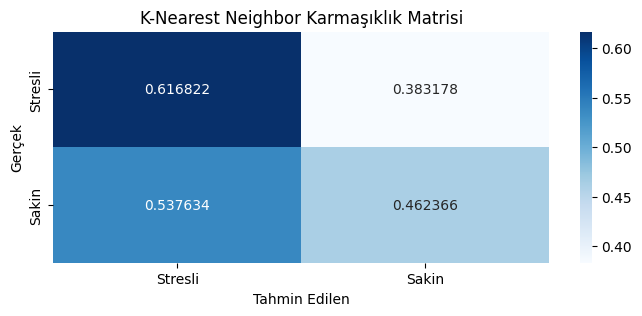


Çapraz geçerleme sonucu K-Nearest Neighbor için elde edilen metrikler:
               precision    recall  f1-score   support

       Sakin       0.51      0.46      0.49        93
     Stresli       0.57      0.62      0.59       107

    accuracy                           0.55       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.55      0.54       200


 Ortalama Doğruluk:  0.545


In [44]:
knn = KNeighborsClassifier()
trainAndEvaluateModel(knn,'K-Nearest Neighbor',tmp_set.to_numpy())

In [45]:
# Tahminleyicilerin performanslarını t-testi ile karşılaştırma

models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression()
}

results = pd.DataFrame(columns=["Tahminleyici", "Ortalama Doğruluk"])

for name, model in models.items():
    scores = cross_val_score(model, X_encoded, y, cv=10)
    results = results.append({"Tahminleyici": name, "Ortalama Doğruluk": scores.mean()}, ignore_index=True)

for i in range(len(results)):
    for j in range(i+1, len(results)):
        model1 = results.iloc[i]["Tahminleyici"]
        model2 = results.iloc[j]["Tahminleyici"]
        scores1 = cross_val_score(models[model1],X_encoded,y, cv=10)
        scores2 = cross_val_score(models[model2],X_encoded,y, cv=10)
        t_stat, p_value = ttest_ind(scores1, scores2)
        if p_value < 0.05: # p değeri çoğu çalışmada 0.05 threshold olarak tutulduğu için biz de bunu seçtik
            print(f"\n\n{model1} ve {model2} arasında istatistiksel olarak anlamlı bir fark bulundu.\n t-statistic: " + str(t_stat) + " p-value: " + str(p_value))



Random Forest ve KNN arasında istatistiksel olarak anlamlı bir fark bulundu.
 t-statistic: 2.239180112586232 p-value: 0.03801171364102339


KNN ve Logistic Regression arasında istatistiksel olarak anlamlı bir fark bulundu.
 t-statistic: -2.1687406033690726 p-value: 0.04374379627354617
